<a href="https://colab.research.google.com/github/SivakumarReddy143/Deep-learning-projects/blob/main/Early_stoping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [14]:
X,y=make_circles(n_samples=100,noise=0.1,random_state=42)

In [15]:
X.shape

(100, 2)

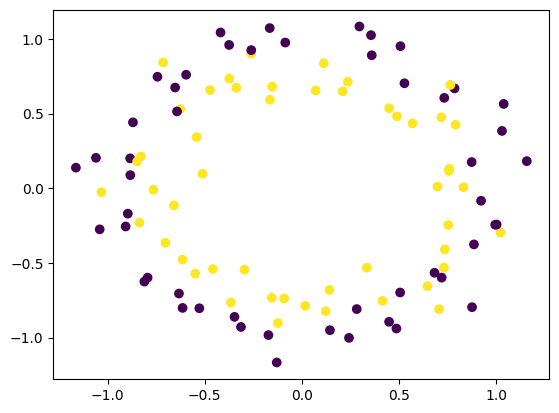

In [16]:
plt.scatter(X[:,0],X[:,1],c=y)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
model=Sequential()
model.add(Dense(300,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3000,verbose=0)

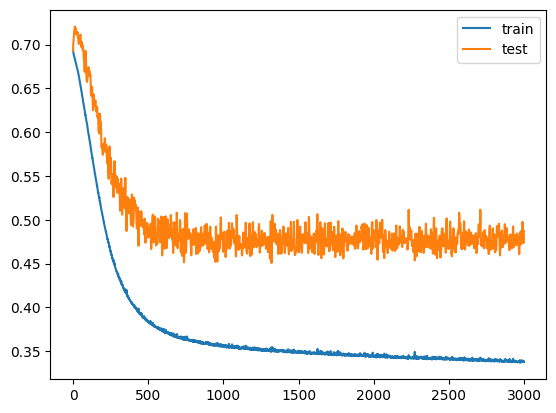

In [22]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

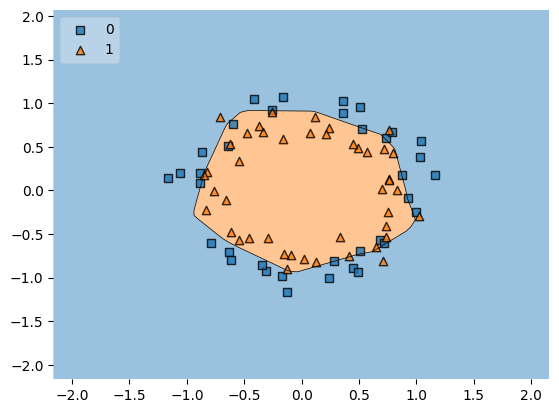

In [23]:
plot_decision_regions(x_train,y_train,clf=model,legend=2)

# Early stoping

In [27]:
model=Sequential()
model.add(Dense(300,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))


In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
callback=EarlyStopping(monitor='val_loss',
                       min_delta=0.00001,
                       patience=30,
                       verbose=1,
                       mode='auto',
                       baseline=None,
                       restore_best_weights=False)

In [39]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3000,verbose=1,callbacks=callback)

Epoch 1/3000
3/3 [==============================] - 0s 49ms/step - loss: 0.6851 - accuracy: 0.6000 - val_loss: 0.7184 - val_accuracy: 0.3000
Epoch 2/3000
3/3 [==============================] - 0s 22ms/step - loss: 0.6845 - accuracy: 0.6000 - val_loss: 0.7195 - val_accuracy: 0.3000
Epoch 3/3000
3/3 [==============================] - 0s 30ms/step - loss: 0.6839 - accuracy: 0.6000 - val_loss: 0.7210 - val_accuracy: 0.3000
Epoch 4/3000
3/3 [==============================] - 0s 28ms/step - loss: 0.6834 - accuracy: 0.6000 - val_loss: 0.7243 - val_accuracy: 0.3000
Epoch 5/3000
3/3 [==============================] - 0s 29ms/step - loss: 0.6829 - accuracy: 0.5875 - val_loss: 0.7266 - val_accuracy: 0.3000
Epoch 6/3000
3/3 [==============================] - 0s 36ms/step - loss: 0.6826 - accuracy: 0.5750 - val_loss: 0.7280 - val_accuracy: 0.3000
Epoch 7/3000
3/3 [==============================] - 0s 27ms/step - loss: 0.6821 - accuracy: 0.6000 - val_loss: 0.7276 - val_accuracy: 0.3000
Epoch 8/3000


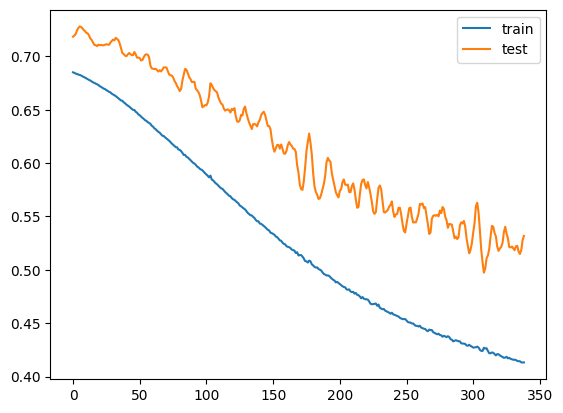

In [40]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

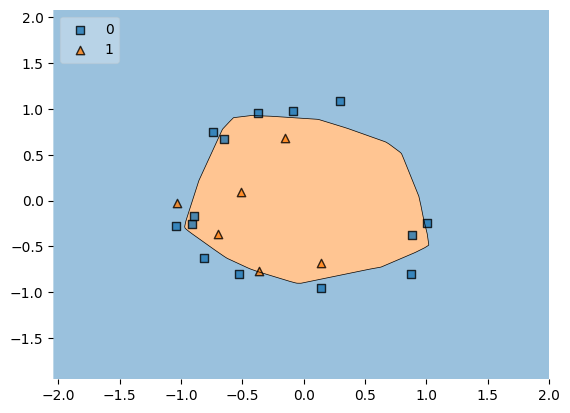

In [41]:
plot_decision_regions(x_test,y_test.ravel(),legend=2,clf=model)